# Travail pratique d'apprentissage automatique 1

### Réalisé par Mulapi Tita Ketsia

Dans ce travail pratique, nous allons principalement nous intérresser à la mise en place d'une séparation linéaire à l'aide d'un perceptron.

C'est quoi un perceptron ?

Selon Wikipédia, le perceptron est un algorithme d'apprentissage supervisé de classifieurs binaires. Il a été inventé en 1957 par Frank Rosenblatt au laboratoire d'aéronautique de l'université Cornell. On dit aussi que le réseau de Neurones le plus simple qui existe porte le nom de perceptron. 

A l'instar du travail réalisé l'année dernière en L3 Science des Données, notre travaille s'articulera au tour de 6 datasets, reparti en 2 groupes dont 3 dédiés à l'apprentissage et, 3 dédiés aux test.

3 questions principales seront abordées, il s'agit notamment de savoir :

1. [**Question 1**](#section1) 🤔

Programmer l'algorithme d'apprentissage du perceptron vu en cours en cherchant
un hyperplan qui sépare une classe d'une autre (soit pour 5 classes, 5*4/2
hyperplans à déterminer). Le tester sur le jeu de données TP1.

2. [**Question 2**](#section2) 🤔

    - Adapter l’algorithme pour qu’il converge vers une solution sur les jeux de données TP2 et TP3 (non linéairement séparables). 
    - Evaluer les performances sur ces deux jeux de données.
    

3. [**Question 3**](#section3) 🤔

Après avoir supprimé des 3 jeux de données la classe centrale (classe ‘e’ ou 5),

    3.1) Adapter votre algorithme de décision en cherchant un hyperplan qui sépare une classe de toutes les autres (soit pour 4 classes, 4 hyperplans à déterminer). 
    
    3.2) Evaluer les performances (taux de bonne classification en Top1, matrice de confusion) sur le jeu de données TP1 et comparer à la version one-vs-one.

4. [**Conclusion**](#section4) 🤔

Comparer l’ensemble des solutions possibles sur les 3 jeux de données.

# Importation des librairies 📥

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Phase de pré-traitement ⛏️

In [4]:
def pretraitement(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    classes=[]
    XList=[]
    YList=[]
    for line in lines:
        line = line.split(" ")
        classes.append(line[0])
        XList.append(line[1])
        YList.append(line[2].replace("\n",""))
    df = pd.DataFrame({"classes":classes,"X":XList,"Y":YList})
    df.info()
    return df

In [5]:
def getClasses(df):
    df.classes = df.classes.astype("int")
    df.X = df.X.astype("float")
    df.Y = df.Y.astype("float")
    w1 = df[df.classes==1].iloc[:,0:3]
    w2 = df[df.classes==2].iloc[:,0:3]
    w3 = df[df.classes==3].iloc[:,0:3]
    w4 = df[df.classes==4].iloc[:,0:3]
    w5 = df[df.classes==5].iloc[:,0:3]
    return w1, w2, w3, w4, w5, df

### Ouverture data app 1 

In [6]:
df_app1 = pretraitement("data_tp1_app.txt")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   classes  500 non-null    object
 1   X        500 non-null    object
 2   Y        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [7]:
w1, w2, w3, w4, w5, df_app1 = getClasses(df_app1)

In [8]:
df_app1

,classes,X,Y
0,1,-6.315382,6.344938
1,1,-4.943573,7.821684
2,1,-8.920876,2.705258
3,1,-5.661533,7.425065
4,1,-5.918269,5.697313
...,...,...,...
495,5,-1.446325,-0.422072
496,5,0.261599,0.479059
497,5,-2.243814,-0.673345
498,5,-0.489892,0.282347


In [9]:
w1

,classes,X,Y
0,1,-6.315382,6.344938
1,1,-4.943573,7.821684
2,1,-8.920876,2.705258
3,1,-5.661533,7.425065
4,1,-5.918269,5.697313
...,...,...,...
95,1,-7.349321,4.544704
96,1,-10.011338,3.986633
97,1,-8.265909,4.298196
98,1,-4.767163,7.536841


In [10]:
w3

,classes,X,Y
200,3,9.135342,-5.820299
201,3,7.580485,-7.192279
202,3,6.424520,-8.413679
203,3,6.382569,-5.297024
204,3,6.375425,-5.881410
...,...,...,...
295,3,8.977618,-4.464873
296,3,5.345582,-5.864768
297,3,7.170776,-3.382814
298,3,3.426561,-7.887567


### Ouverture data dec 1

In [11]:
df_dec1 = pretraitement("data_tp1_dec.txt")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   classes  500 non-null    object
 1   X        500 non-null    object
 2   Y        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [12]:
w1_test, w2_test, w3_test, w4_test, w5_test, df_dec1 = getClasses(df_dec1)

In [13]:
df_dec1

,classes,X,Y
0,1,-4.840798,5.117552
1,1,-2.458894,5.701029
2,1,-5.195775,6.207984
3,1,-6.059512,4.324269
4,1,-5.864124,8.061702
...,...,...,...
495,5,-0.532394,-0.478236
496,5,-0.596780,-1.310213
497,5,0.645414,0.058871
498,5,0.679295,-1.391780


In [14]:
w1

,classes,X,Y
0,1,-6.315382,6.344938
1,1,-4.943573,7.821684
2,1,-8.920876,2.705258
3,1,-5.661533,7.425065
4,1,-5.918269,5.697313
...,...,...,...
95,1,-7.349321,4.544704
96,1,-10.011338,3.986633
97,1,-8.265909,4.298196
98,1,-4.767163,7.536841


## Visualisation des datasets

In [15]:
def afficher_dataset(df):
    plt.figure(figsize=(15,8))
    for i in range(5): 
        plt.plot(df[df.iloc[:,0]==i+1].iloc[:,0:3].iloc[:,1], df[df.iloc[:,0]==i+1].iloc[:,0:3].iloc[:,2], 'o', label="classes : "+str(i+1))
        plt.legend()

### dataset app 1

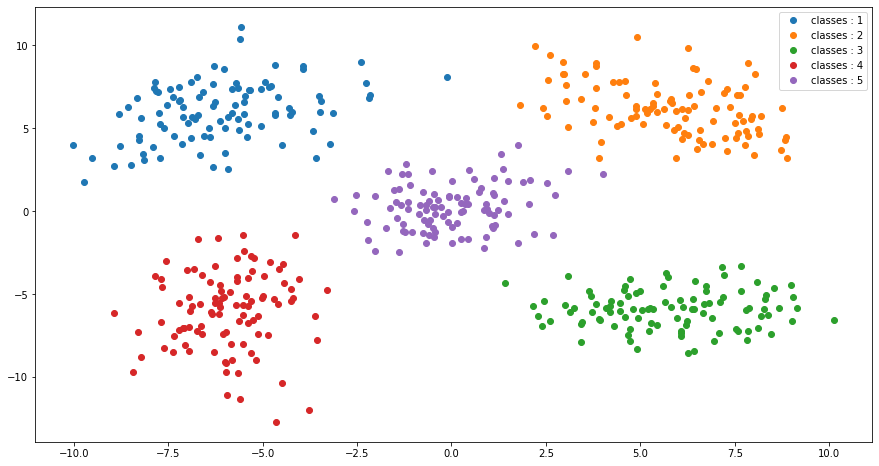

In [16]:
afficher_dataset(df_app1)

### dataset test 1

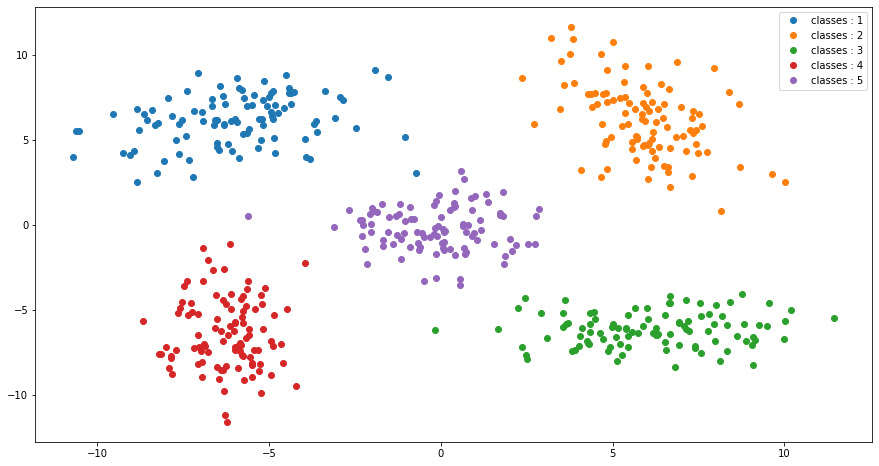

In [17]:
afficher_dataset(df_dec1)

On met de coté notre dataset_test1 et on travaille avec notre dataset_app1 pour construire notre modèle afin de ressortir la droite.

### Fonction transformation

La transformation nous permet de passer d'une dimension à une autre afin de dégager, dans la mesure du possible, la solution optimale qui n'est rien d'autrez que la droite de séparation linéaire.

In [15]:
def Xtransformation(W1, W2):
    new_w1 = W1.iloc[:,1:3]
    new_w1["Z"] = 1
    new_w2 = W2.iloc[:,1:3]
    new_w2 = W2.iloc[:,1:3]*-1
    new_w2["Z"] = -1
    return new_w1, new_w2

<a id="section1"></a>
# Question 1 :

Programmer l'algorithme d'apprentissage du perceptron vu en cours en cherchant un hyperplan qui sépare une classe d'une autre (soit pour 5 classes, 5*4/2 = 10 hyperplans à déterminer). Le tester sur le jeu de données TP1.

## Réalisons 1 Perceptron

### Partie 1 (apprentissage) : W1 vs W2

#### Transformation des éléments de  W1 & W2

In [17]:
W1_y, W2_y = Xtransformation(w1, w2)

In [20]:
W1_y

,X,Y,Z
0,-6.315382,6.344938,1
1,-4.943573,7.821684,1
2,-8.920876,2.705258,1
3,-5.661533,7.425065,1
4,-5.918269,5.697313,1
...,...,...,...
95,-7.349321,4.544704,1
96,-10.011338,3.986633,1
97,-8.265909,4.298196,1
98,-4.767163,7.536841,1


In [21]:
W2_y

,X,Y,Z
100,-3.043789,-6.633307,-1
101,-7.284288,-7.361353,-1
102,-7.383151,-6.271942,-1
103,-2.526411,-5.743564,-1
104,-5.834545,-6.516551,-1
...,...,...,...
195,-6.589146,-4.919101,-1
196,-6.501155,-3.779524,-1
197,-7.291663,-3.639030,-1
198,-3.837973,-8.944113,-1


#### Vecteur A avec les a(i) = (0, 0 ,0) initialement

In [22]:
A = np.array([0, 0, 0])

In [23]:
A.shape

(3,)

In [24]:
len(A)

3

In [25]:
A

array([0, 0, 0])

## Mise en oeuvre et usage de l'algorithme de perceptron

In [16]:
def perceptron(W1, W2, A):
    assert len(A)==W1.shape[1]
    W = np.array(pd.concat([W1, W2]))
    Vecteur_A = [A]
    #juste pour savoir combien d'itération a été fait !
    iteration = 0 
    check = True
    while(check):
        #check = True
        check = False
        iteration += 1
        for i in range(len(W)):
            if(np.dot(W[i,0:3],A.reshape(-1,1))[0]<=0):
                check = True
                A = np.add(W[i,0:3],A)
                #print(A)
        Vecteur_A.append(A)
        n = len(Vecteur_A)
        #    check = False
    return Vecteur_A, n, iteration

In [27]:
p_app1, n, iteration = perceptron(W1_y,W2_y,A)

In [28]:
iteration

3

In [29]:
n

4

In [30]:
p_app1 # Les A[i] selon le nombre d'itération

[array([0, 0, 0]),
 array([-9.359171, -0.288369,  0.      ]),
 array([-12.527644,   1.184328,   0.      ]),
 array([-12.527644,   1.184328,   0.      ])]

In [31]:
p_app1[len(p_app1)-1]

array([-12.527644,   1.184328,   0.      ])


## Approche One Versus One

### Affichons une sépartion linéaire à l'aide de fonctions factorisées

In [17]:
def point_coeff_dir(A, precision):
    pointX = []
    pointY = []
    for i in range(precision[2], precision[1], precision[0]):
        Coefficient_directeur = (-A[0] /A[1]) * i - A[2] / A[1]
        #Coefficient_directeur = (-1/a[1])*(a[0]+a[2]*x)
        pointX.append(i)
        pointY.append(Coefficient_directeur)
    return pointX,pointY

In [18]:
def uneSeparation(A, X, precision, txt, a, b):
    plt.figure(figsize=(10,5))
    pointX, pointY = point_coeff_dir(A, precision)
    plt.plot((X.iloc[0:99, 1:3]).iloc[:,0], (X.iloc[0:99, 1:3]).iloc[:, 1], 'o', label= 'classe '+str(a), color="black")
    plt.plot((X.iloc[100:199, 1:3]).iloc[:, 0], (X.iloc[100:199, 1:3]).iloc[:, 1], '+', label= 'classe '+str(b), color="red") 
    plt.title(txt)
    plt.legend()
    plt.plot(pointX, pointY)

In [19]:
def screenOvsO(w1,w2,txt, a, b):    
    A = np.array([0,0,0])
    C1, C2 = Xtransformation(w1, w2)
    p_app1, n, iteration = perceptron(C1,C2,A)
    uneSeparation(p_app1[len(p_app1)-1], pd.concat([w1, w2]), [1, 10, -10],txt, a, b)

In [20]:
def screenAll(w1,w2):    
    A = np.array([0,0,0])
    C1, C2 = Xtransformation(w1, w2)
    p_app1, n, iteration = perceptron(C1,C2,A)
    precision=[1, 10, -10]
    pointX, pointY = point_coeff_dir(p_app1[len(p_app1)-1], precision)
    return pointX, pointY

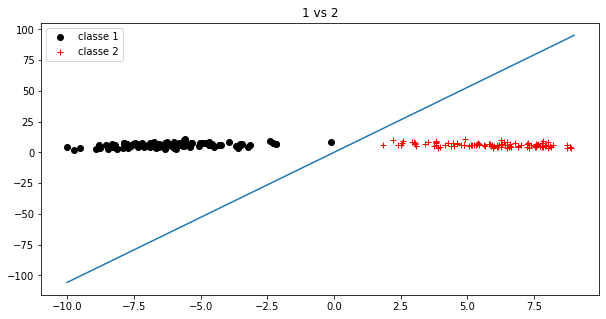

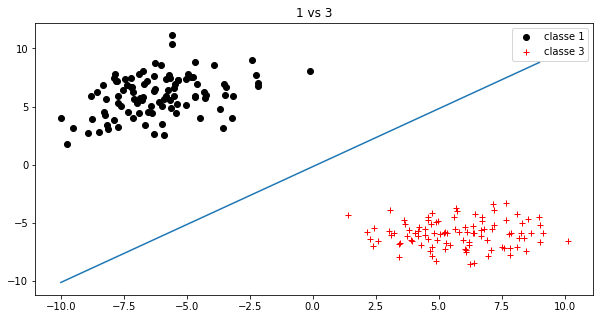

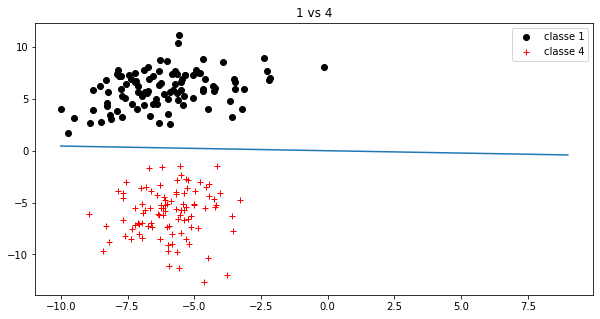

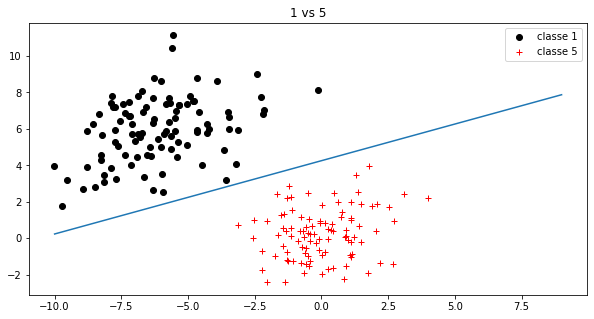

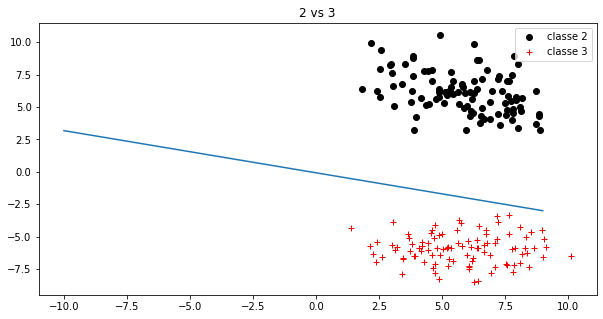

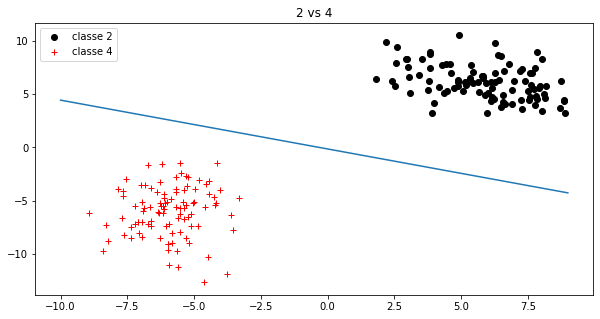

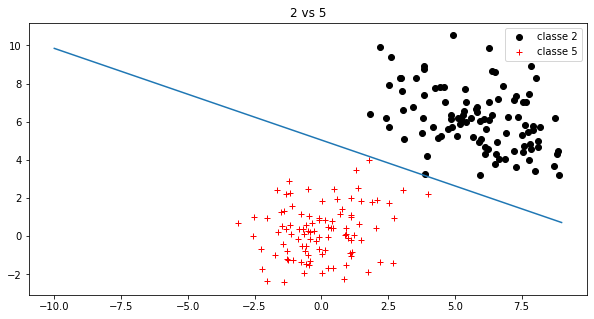

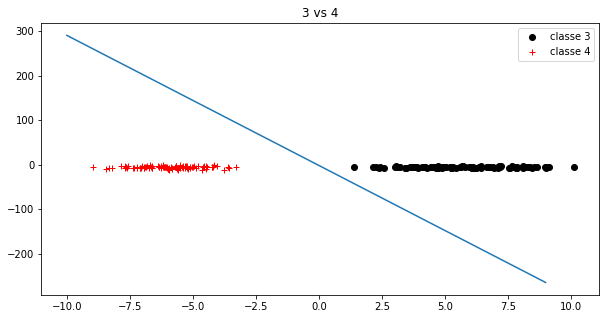

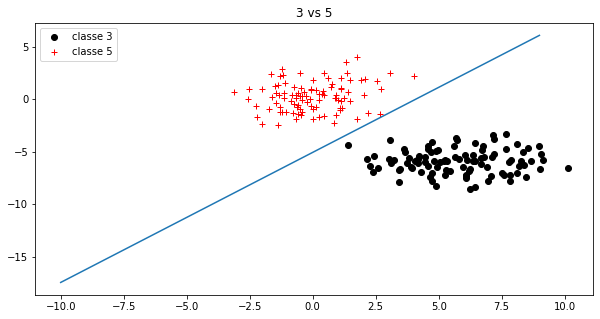

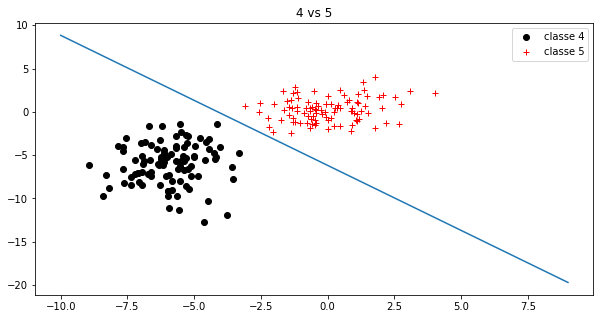

In [37]:
screenOvsO(w1,w2, "1 vs 2", 1, 2)
screenOvsO(w1,w3, "1 vs 3", 1, 3)
screenOvsO(w1,w4, "1 vs 4", 1, 4)
screenOvsO(w1,w5, "1 vs 5", 1, 5)
screenOvsO(w2,w3, "2 vs 3", 2, 3)
screenOvsO(w2,w4, "2 vs 4", 2, 4)
screenOvsO(w2,w5, "2 vs 5", 2, 5)
screenOvsO(w3,w4, "3 vs 4", 3, 4)
screenOvsO(w3,w5, "3 vs 5", 3, 5)
screenOvsO(w4,w5, "4 vs 5", 4, 5)

## Affichage général 

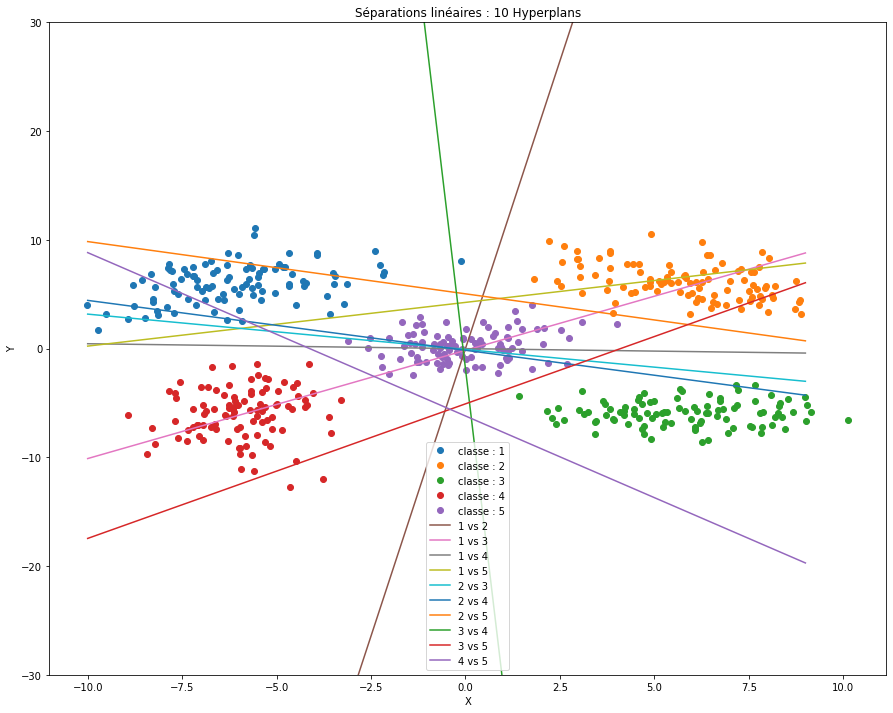

In [38]:
plt.figure(figsize=(15,12))

for i in range(5):
    plt.plot(df_app1[df_app1.iloc[:,0]==i+1].iloc[:,0:3].iloc[:,1], df_app1[df_app1.iloc[:,0]==i+1].iloc[:,0:3].iloc[:,2], 'o', label="classe : "+str(i+1))
    plt.legend()

pointX1, pointY1 = screenAll(w1,w2)
plt.plot(pointX1, pointY1, label="1 vs 2")

pointX2, pointY2 = screenAll(w1,w3)
plt.plot(pointX2, pointY2,label="1 vs 3")

pointX3, pointY3 = screenAll(w1,w4)
plt.plot(pointX3, pointY3,label="1 vs 4")

pointX4, pointY4 = screenAll(w1,w5)
plt.plot(pointX4, pointY4, label="1 vs 5")

pointX5, pointY5 = screenAll(w2,w3)
plt.plot(pointX5, pointY5,label="2 vs 3")

pointX6, pointY6 = screenAll(w2,w4)
plt.plot(pointX6, pointY6,label="2 vs 4")

pointX7, pointY7 = screenAll(w2,w5)
plt.plot(pointX7, pointY7, label="2 vs 5")

pointX8, pointY8 = screenAll(w3,w4)
plt.plot(pointX8, pointY8,label="3 vs 4")

pointX9, pointY9 = screenAll(w3,w5)
plt.plot(pointX9, pointY9,label="3 vs 5")

pointX10, pointY10 = screenAll(w4,w5)
plt.plot(pointX10, pointY10, label="4 vs 5")

plt.ylim((-30,30))
plt.title("Séparations linéaires : 10 Hyperplans")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(loc="lower center")
plt.show()

### Partie 2 (Prediction) : Testons nos droites obtenues à l'aide des données d'apprentissage du dataset 1 sur les données de test (décision) du data_tp1_dec 

#### Notre dataset de test

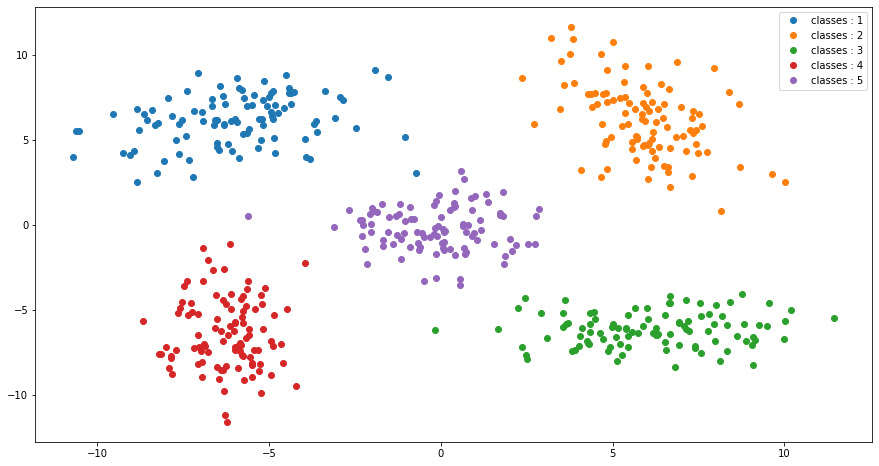

In [39]:
afficher_dataset(df_dec1)

### 😎😎 Petit Bonus : avant d'achever ce "OvsO", on souhaite observer nos droites de séparation linéaires obtenues à l'aide du dataset_tp1_app sur le dataset_tp1_dec afin d'avoir une idée visuelle de ce que pourra être la performance de notre implémentation.

In [21]:
def test_dec(w1,w2,a,b):
    A = np.array([0,0,0])
    plt.figure(figsize=(10,8))
    symbole = 'o'
    coleur = "black"
    for i in range(a-1,b,b-a):
        if(i==a-1):
            symbole = 'o'
            coleur = "black"
        elif(i==b-1):
            symbole = '+'
            coleur = "red"
        plt.plot(df_dec1[df_dec1.iloc[:,0]==i+1].iloc[:,0:3].iloc[:,1], df_dec1[df_dec1.iloc[:,0]==i+1].iloc[:,0:3].iloc[:,2], symbole, label="classe : "+str(i+1)+" du data_tp1_dec", color=coleur)
        plt.legend()

    pointX1, pointY1 = screenAll(w1,w2)
    plt.plot(pointX1, pointY1, label="droite "+str(a)+" vs " + str(b)+ " obtenue à l'aide du data_tp1_app")


    plt.title("Séparation linéaire data_tp1_dec : "+str(a)+" vs " + str(b)+ "")
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.legend(loc="lower center")
    plt.show()

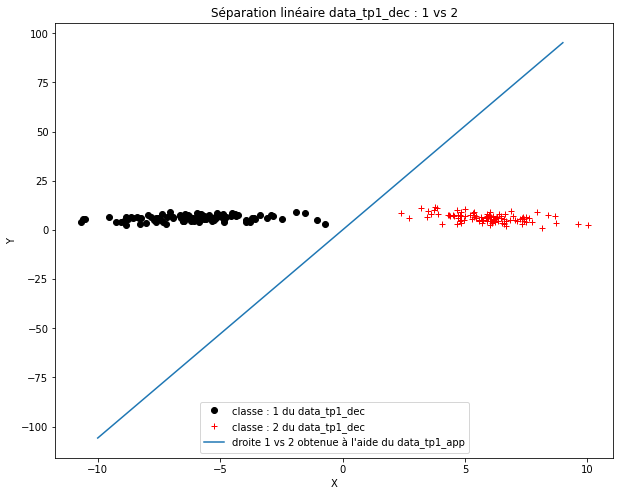

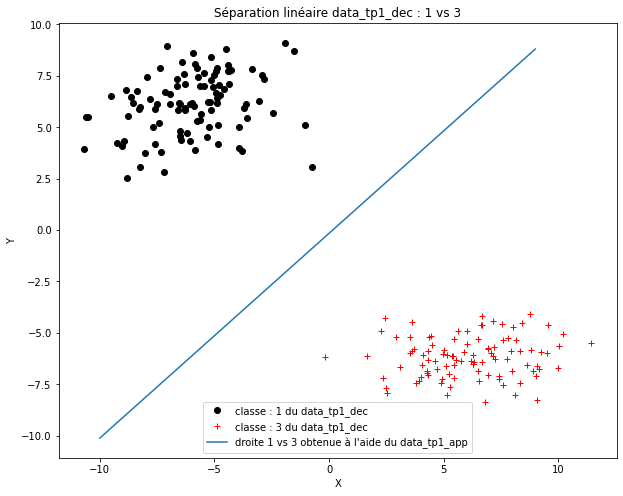

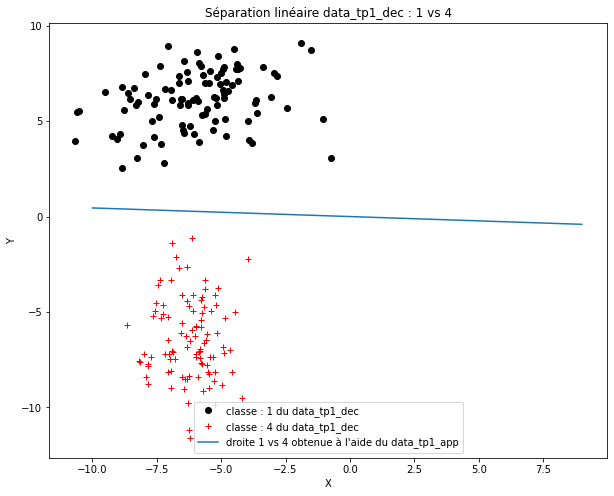

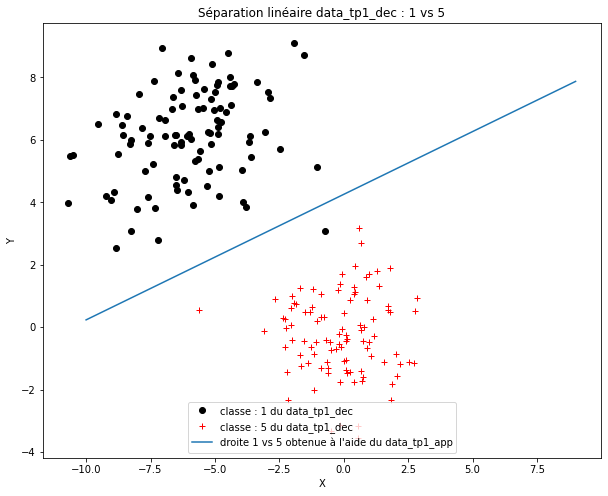

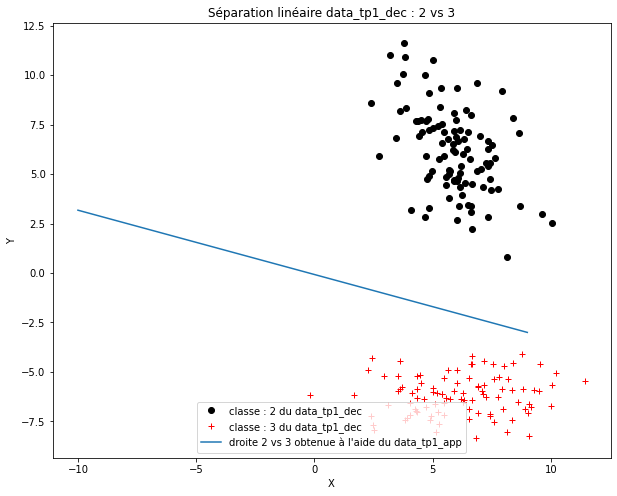

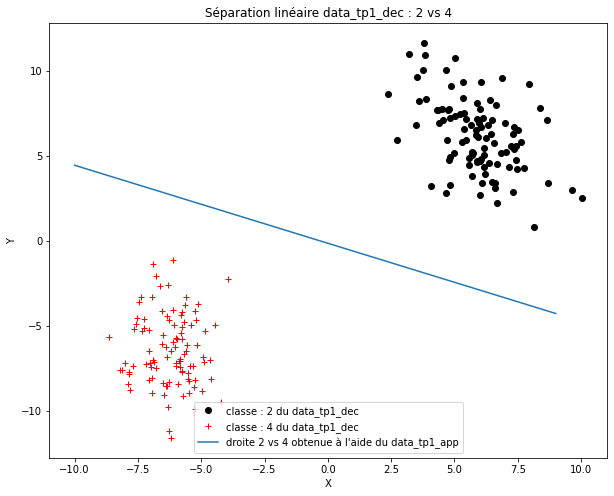

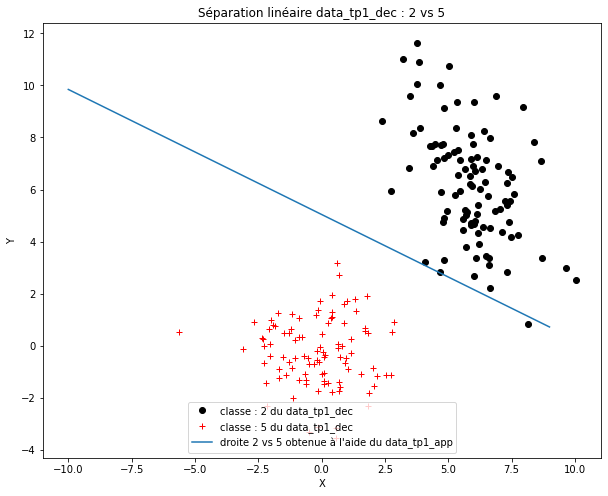

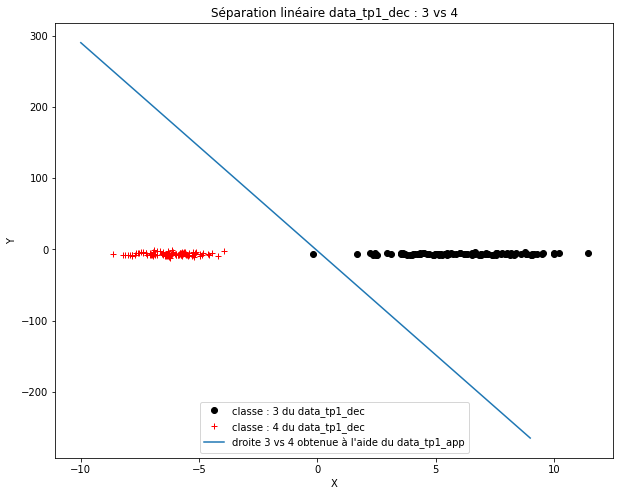

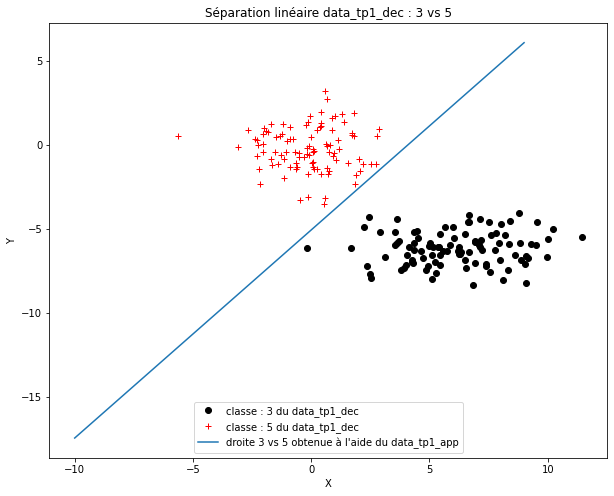

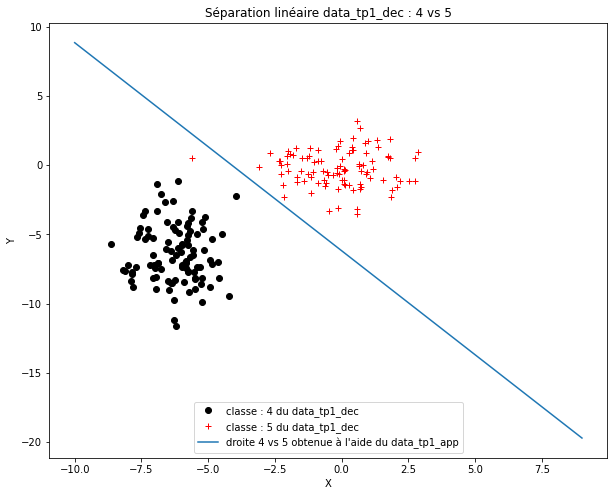

In [41]:
test_dec(w1,w2,1,2)
test_dec(w1,w3,1,3)
test_dec(w1,w4,1,4)
test_dec(w1,w5,1,5)
test_dec(w2,w3,2,3)
test_dec(w2,w4,2,4)
test_dec(w2,w5,2,5)
test_dec(w3,w4,3,4)
test_dec(w3,w5,3,5)
test_dec(w4,w5,4,5)

<a id="section2"></a>
# Question 2 :

### Adapter l’algorithme pour qu’il converge vers une solution sur les jeux de données TP2 et TP3 (non linéairement séparables). Evaluer les performances sur ces deux jeux de données.

C'est à dire, faire la même chose masi sur les jeux de données TP2 et TP3 puis en suite, évaluer les performances sur ces deux jeux de données.

### - TP2_app = W(i)_app2 (cette écriture se lit : classe i du jeux d'apprentissage 2)

In [63]:
df_app2 = pretraitement("data_tp2_app.txt")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   classes  500 non-null    object
 1   X        500 non-null    object
 2   Y        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [43]:
w1_app2, w2_app2, w3_app2, w4_app2, w5_app2, df_app2 = getClasses(df_app2)

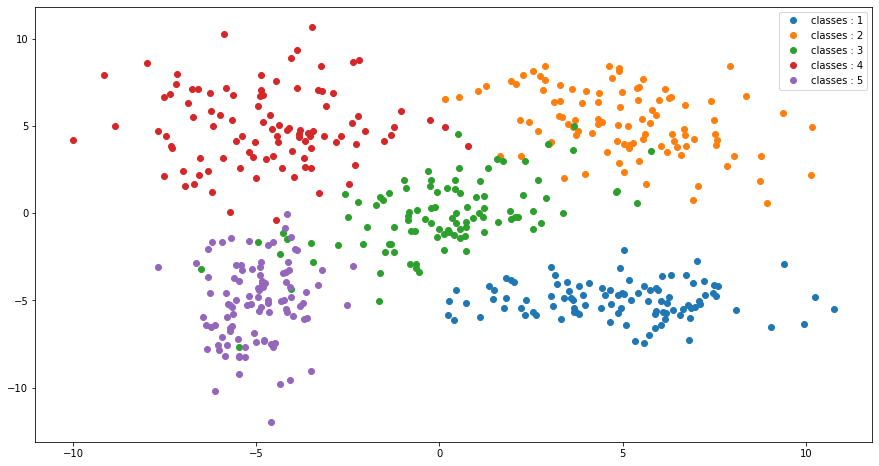

In [44]:
afficher_dataset(df_app2)

### - TP3_app

In [64]:
df_app3 = pretraitement("data_tp3_app.txt")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   classes  500 non-null    object
 1   X        500 non-null    object
 2   Y        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [46]:
w1_app3, w2_app3, w3_app3, w4_app3, w5_app3, df_app3 = getClasses(df_app3)

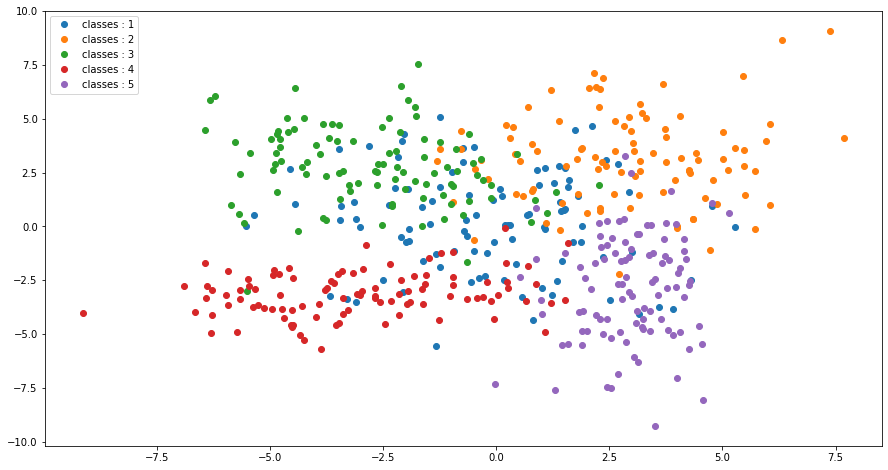

In [47]:
afficher_dataset(df_app3)

## Score et Règle de décision : La droite d'équation pour évaluer le taux de bonne classification 


> si ***a(n-1).T * y(n) > 0*** alors yn est bien classé ::: à retenir


> Sinon si ***a(n-1).T * y(n) = 0*** alors yn est sur la droite ::: à rejeter


> Sinon ***a(n-1).T * y(n) < 0*** alors yn est mal classé ::: à rejeter

In [22]:
def equation(an,xn):
    # on utilise les données d'apprentissages pour
    # construire l'équation de la droite
    # avec, les coef ai trouvé à l'aide du perceptron
    a1 = an[0]
    a2 = an[1]
    a3 = an[2]
    x1 = xn[1]
    x2 = xn[2]
    # l'équation de la droite pour un W1 vs W2 est alors :
    #print(a1)
    eq = a1 * x1 + a2 * x2 + a3
    return eq

In [23]:
def classification_accuracy(W1,last_a,W2,size1,size2):
    tx = 0
    size_of_data = size1+size2
    for point1 in W1:
        metrique1=equation(last_a,point1)
        if metrique1>0:
            tx = tx + 1
    for point2 in W2:
        metrique2=equation(last_a,point2)
        if metrique2>0:
            tx = tx + 1
    return (tx * 100)/ size_of_data

## Perceptron adapté à TP2 et TP3

In [24]:
def perceptron_adapte(W1, W2, A):
    assert len(A)==W1.shape[1]
    W = np.array(pd.concat([W1, W2]))
    Vecteur_A = [A]
    #juste pour savoir combien d'itération ont été faites !
    iteration = 0 
    check = True
    sizeW1 = len(W1)
    sizeW2 = len(W2)
    taux = 100
    check_error = True
    while(check and check_error):
        check = False
        iteration += 1
        check_error = False
        #print("*************************")
        #print("iteration="+str(iteration))
        for i in range(len(W)):
            if(np.dot(W[i,0:3],A.reshape(-1,1))[0]<=0):
                check = True
                A = np.add(W[i,0:3],A)
                #print(A)
        Vecteur_A.append(A)
        n = len(Vecteur_A)
        new_taux =  classification_accuracy(np.array(W1),Vecteur_A[len(Vecteur_A)-1],np.array(W2),sizeW1,sizeW2)
        if new_taux != taux:
            check_error = True
        taux = new_taux             
    return Vecteur_A, n, iteration #, "le taux de performance est : " +str(taux)

In [25]:
def point_coeff_dir(A, precision):
    pointX = []
    pointY = []
    for i in range(precision[2], precision[1], precision[0]):
        Coefficient_directeur = (-A[0] /A[1]) * i - A[2] / A[1]
        if abs(Coefficient_directeur) > 25:
            continue 
        pointX.append(i)
        pointY.append(Coefficient_directeur)
    return pointX,pointY

In [26]:
def uneSeparationForOneVsOne(A, X, precision, txt, a, b, dataset, plt):
    pointX, pointY = point_coeff_dir(A, precision)
    plt.plot((X.iloc[0:99, 1:3]).iloc[:,0], (X.iloc[0:99, 1:3]).iloc[:, 1], 'o', label= 'classe w'+str(a)+' du jeux_dec'+str(dataset), color="black")
    plt.plot((X.iloc[100:199, 1:3]).iloc[:, 0], (X.iloc[100:199, 1:3]).iloc[:, 1], '+', label= 'classe w'+str(b)+' du jeux_dec'+str(dataset), color="red")  
    plt.plot(pointX, pointY, label= 'droite obtenue à l\'aide de '+txt) 
    plt.legend()

In [27]:
def OvsO_adapte(W1, W2, W1_test, W2_test, dataset, txt, a, b, plt):
    A = np.array([0,0,0])
    precision=[1, 25, -25] 
    p_app1, n, iteration = perceptron_adapte(W1, W2, A)
    uneSeparationForOneVsOne(p_app1[len(p_app1)-1], pd.concat([W1_test, W2_test]), precision, txt, a, b, dataset, plt)
    return "le taux de bonne classification est : "+str(classification_accuracy(np.array(W1_test), p_app1[len(p_app1)-1],np.array(W2_test),len(W1_test),len(W2_test)))+ " %"

### Pour TP2_app & TP2_test

In [65]:
df_dec2 = pretraitement("data_tp2_dec.txt")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   classes  500 non-null    object
 1   X        500 non-null    object
 2   Y        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [535]:
w1_dec2, w2_dec2, w3_dec2, w4_dec2, w5_dec2, df_dec2 = getClasses(df_dec2)

#### Ci-dessous, on lira : 

#### Classe1 (w1) vs Classe2 (w2) des données de test  du dataset _de décision (dec)_ 2 (w_dec2), testé sur la droite de séparation linéaire obtenue à l'aide des Classes 1 et 2 des données _d'apprentissages_ du dataset 2 (w_app2).

'le taux de bonne classification est : 98.0 %'

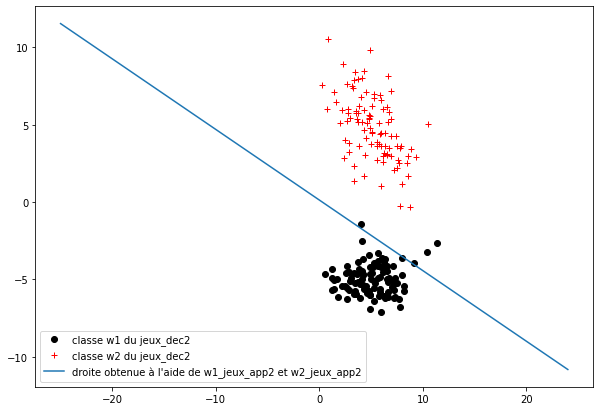

In [617]:
plt.figure(figsize=(10,7))
dataset = 2
OvsO_adapte(w1_app2, w2_app2, w1_test2, w2_test2, dataset, "w1_jeux_app2 et w2_jeux_app2", 1, 2, plt.gca())

Autre illustration ... :

'le taux de bonne classification est : 28.5 %'

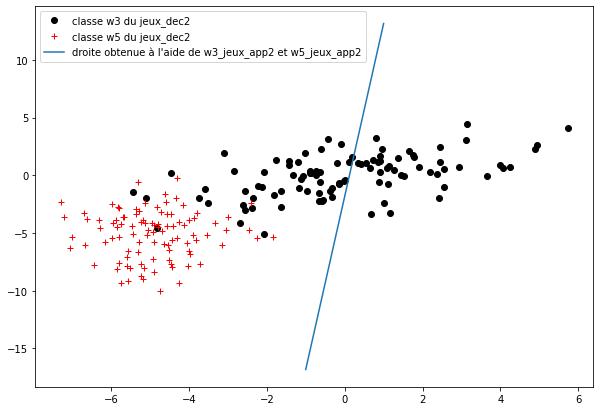

In [618]:
plt.figure(figsize=(10,7))
dataset = 2
OvsO_adapte(w3_app2, w5_app2, w3_test2, w5_test2, dataset, "w3_jeux_app2 et w5_jeux_app2", 3, 5, plt.gca())

'le taux de bonne classification est : 95.0 %'

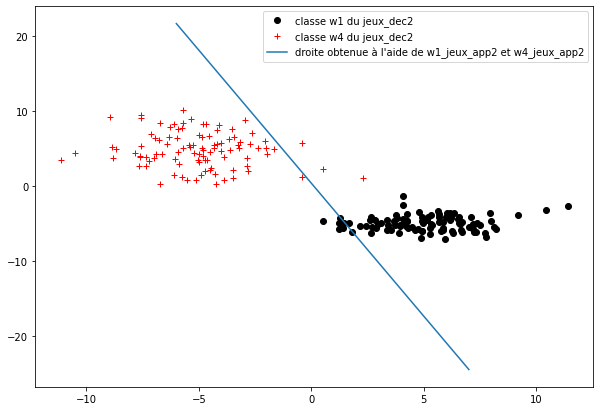

In [626]:
plt.figure(figsize=(10,7))
dataset = 2
OvsO_adapte(w1_app2, w4_app2, w1_test2, w4_test2, dataset, "w1_jeux_app2 et w4_jeux_app2", 1, 4, plt.gca())

Et ainsi de suite...on peut donc constater que le dataset 2 n'est pas linéairement séparable.

### Pour TP3_app & TP3_test

In [66]:
df_dec3 = pretraitement("data_tp3_dec.txt")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   classes  500 non-null    object
 1   X        500 non-null    object
 2   Y        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [566]:
w1_test3, w2_test3, w3_test3, w4_test3, w5_test3, df_dec3 = getClasses(df_dec3)

'le taux de bonne classification est : 30.0 %'

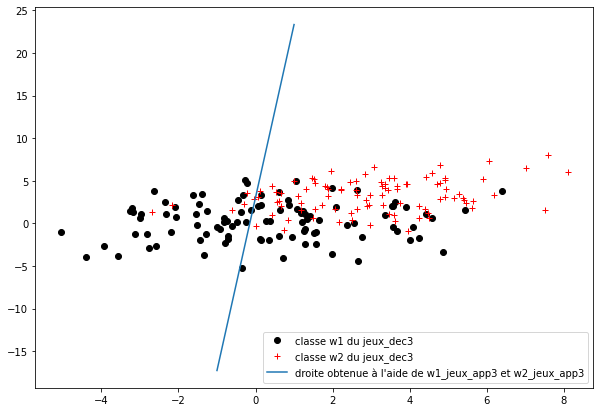

In [571]:
plt.figure(figsize=(10,7))
dataset = 3
OvsO_adapte(w1_app3, w2_app3, w1_test3, w2_test3, dataset, "w1_jeux_app3 et w2_jeux_app3", 1, 2, plt.gca())

'le taux de bonne classification est : 97.5 %'

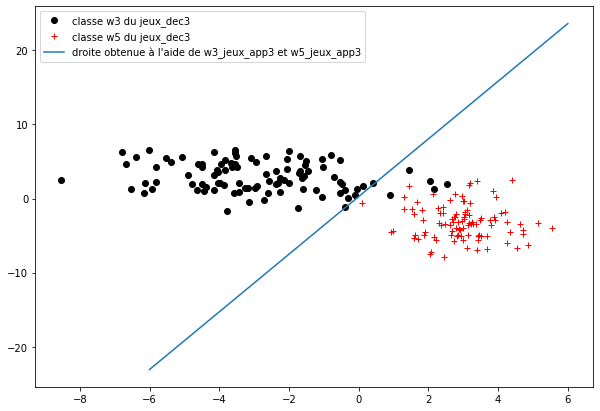

In [1089]:
plt.figure(figsize=(10,7))
dataset = 3
OvsO_adapte(w3_app3, w5_app3, w3_test3, w5_test3, dataset, "w3_jeux_app3 et w5_jeux_app3", 3, 5, plt.gca())

Le dataset 3 aussi n'est pas linéairement séparable.

<a id="section3"></a>
# Question 3 

### Approche One Versus All 🤓

- Après avoir supprimé des 3 jeux de données la classe centrale (classe ‘e’ ou 5), adapter votre algorithme de décision en cherchant un hyperplan qui sépare une classe de toutes les autres (soit pour 4 classes, 4 hyperplans à déterminer).

In [28]:
def split_data_for_OvsA(df,Classe_i):
    # Si ci = 1, 2, 3 ou 4
    W1 = df[df.classes==Classe_i].iloc[:,0:3] # Classe 1
    W2 = df[df.classes!=Classe_i].iloc[:,0:3] # Classe 2, 3, 4
    W2 = W2[W2.classes!=5].iloc[:,0:3]
    return W1,W2

* Evaluer les performances (taux de bonne classification en Top1, matrice de confusion)

In [29]:
def Confusion_Matrix(w1,w,w1_test,w2_test, txt):
    plt.figure()
    plt.ylim((-50,50))
    accuracy = []
    w = [w1,w2,w3,w4]
    for i in range(3):
        accuracy.append(screen_OvsO_adapte2(w1, w[i], w1_test, w2_test, txt, c1, c2, plt.gca()))
    return accuracy

* perceptron One versus All

In [30]:
def perceptron_OvA(df, Classe_i, A):
    assert len(A)==df.shape[1]
    W1, W2 = split_data_for_OvsA(df,Classe_i)
    W1T, W2T = Xtransformation(W1, W2)  
    W = np.array(pd.concat([W2T,W1T]))
    Vecteur_A = [A]
    #juste pour savoir combien d'itération ont été faites !
    iteration = 0 
    check = True
    sizeW1 = len(W1)
    sizeW2 = len(W2)
    taux = 100
    check_error = True
    while(check and check_error):
        check = False
        iteration += 1
        check_error = False
        #print("*************************")
        #print("iteration="+str(iteration))
        for i in range(len(W)):
            if(np.dot(W[i,0:3],A.reshape(-1,1))[0]<=0):
                check = True
                A = np.add(W[i,0:3],A)
                #print(A)
        Vecteur_A.append(A)
        n = len(Vecteur_A)
        new_taux =  classification_accuracy2(np.array(W1),Vecteur_A[len(Vecteur_A)-1],np.array(W2),sizeW1,sizeW2)
        if new_taux != taux:
            check_error = True
        taux = new_taux    
    return Vecteur_A, n, iteration    

In [27]:
A = np.array([0,0,0])
p_app, n, iteration = perceptron_OvA(df_app1, 1, A)

In [28]:
n

3

In [29]:
iteration

2

In [30]:
p_app[len(p_app)-1]

array([ 0.237005,  7.827912, -8.      ])

### Fonctions pour réaliser une sépartion linéaire OvsAll sur TP2

In [31]:
def point_coeff_dir2(Classe_i, A, precision):
    pointX = []
    pointY = []
    for i in range(precision[2], precision[1], precision[0]):
        Coefficient_directeur = ((-A[0])* i - A[2]) / A[1]
        if(Classe_i==3):
            pointX.append(i/100)
            pointY.append(Coefficient_directeur/100)            
        else :
            pointX.append(i)
            pointY.append(Coefficient_directeur)
    return pointX,pointY

In [32]:
def uneSeparation_OvsAll(Classe_i, A, X1, X2, precision, txt, a, b):
    plt.figure(figsize=(15,10))
    pointX, pointY = point_coeff_dir2(Classe_i, A, precision)
    plt.scatter((X1.iloc[:, 1:3]).iloc[:,0], (X1.iloc[:, 1:3]).iloc[:, 1], label= 'classe '+str(a)+'')
    plt.scatter((X2.iloc[:, 1:3]).iloc[:, 0], (X2.iloc[:, 1:3]).iloc[:, 1], label= 'classes '+str(b)+'')
    plt.title(txt)
    plt.legend()
    plt.plot(pointX, pointY)

In [33]:
def screenOvsAll(Classe_i, df,txt, a, b):    
    A = np.array([0,0,0])
    X1, X2 = split_data_for_OvsA(df,Classe_i)
    p_app, n, iteration = perceptron_OvA(df, Classe_i, A)
    uneSeparation_OvsAll(Classe_i,p_app[len(p_app)-1], X1, X2, [1, 15, -15],txt, a, b)

### 1. Visualisation à l'aide des données d'apprentissage 1, des droites séparations linéaires obtenues à l'aide de ces même données

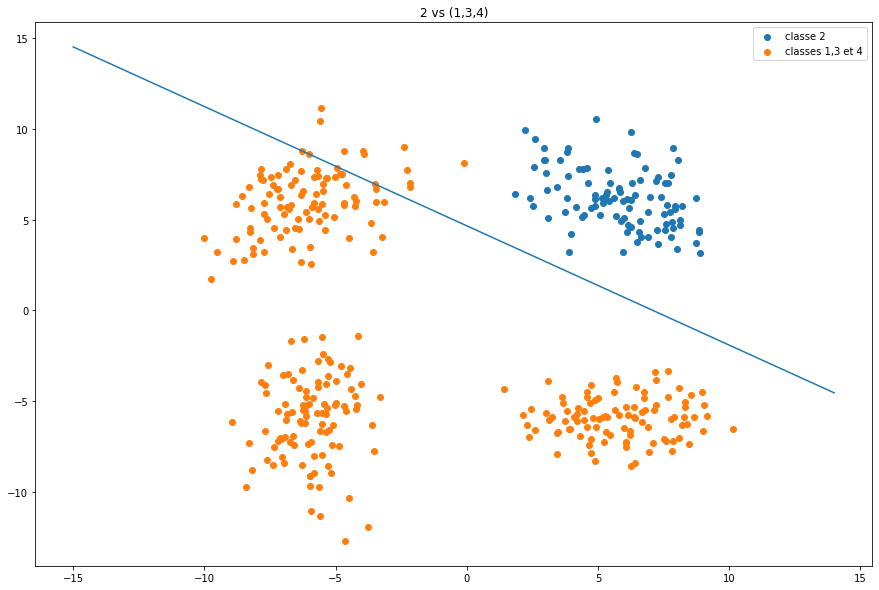

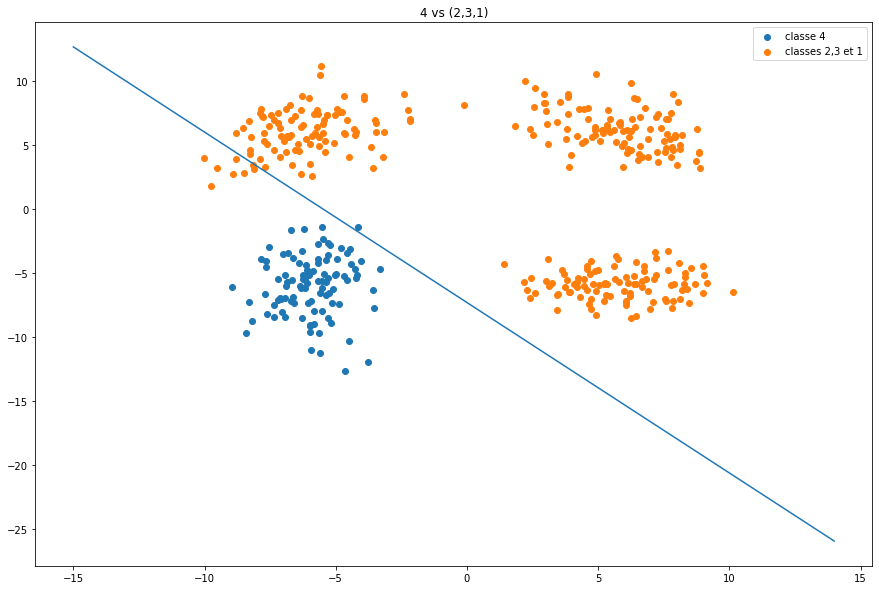

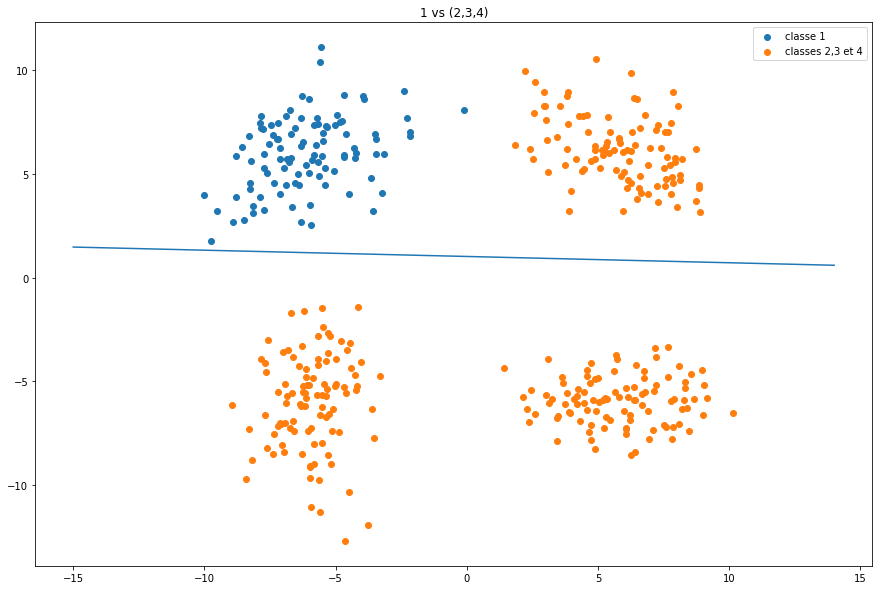

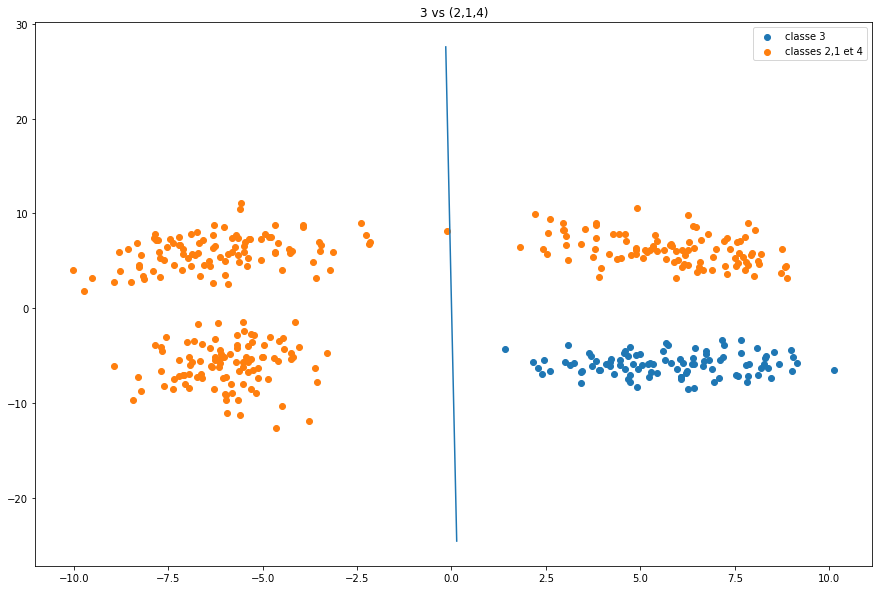

In [1088]:
screenOvsAll(2, df_app1, "2 vs (1,3,4)", "2", "1,3 et 4")
screenOvsAll(4, df_app1, "4 vs (2,3,1)", "4", "2,3 et 1")
screenOvsAll(1, df_app1, "1 vs (2,3,4)", "1", "2,3 et 4")
screenOvsAll(3, df_app1, "3 vs (2,1,4)", "3", "2,1 et 4")

### 2. Evaluation TOP 1 :On test nos données de décisions sur les droites de séparations linéaires obtenues après apprentissage

In [34]:
def classification_accuracy2(W1,last_a,W2,size1,size2):
    tx = 0
    size_of_data = size1+size2
    for point1 in W1:
        metrique1=equation(last_a,point1)
        if metrique1>0:
            tx = tx + 1
    for point2 in W2:
        metrique2=equation(last_a,point2)
        if metrique2<0:
            tx = tx + 1
    return (tx * 100)/ size_of_data

In [35]:
def OvsA_adapte(Classe_i,df_app, df_dec, txt, a, b):
    A = np.array([0,0,0])
    precision=[1, 25, -25]     
    X1_dec, X2_dec = split_data_for_OvsA(df_dec,Classe_i)
    p_app, n, iteration = perceptron_OvA(df_app, Classe_i, A)
    uneSeparation_OvsAll(Classe_i,p_app[len(p_app)-1], X1_dec, X2_dec, [1, 15, -15],txt, a, b)
    return "le taux de bonne classification est : "+str(classification_accuracy2(np.array(X1_dec), p_app[len(p_app)-1],np.array(X2_dec),len(X1_dec),len(X2_dec)))+ " %"

'le taux de bonne classification est : 98.0 %'

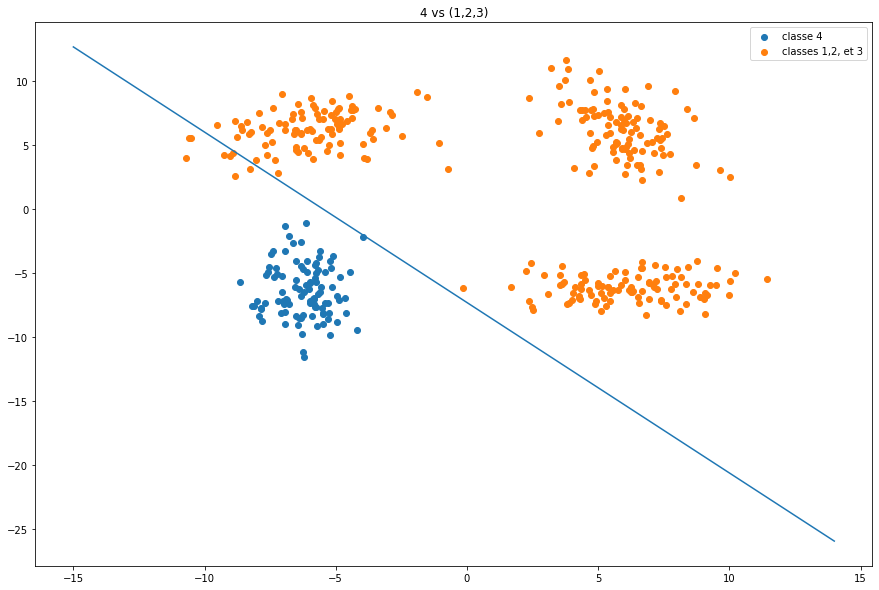

In [45]:
OvsA_adapte(4,df_app1, df_dec1, "4 vs (1,2,3)", "4", "1,2, et 3")

# Pas mal on dirait 😉👌 !!

'le taux de bonne classification est : 97.0 %'

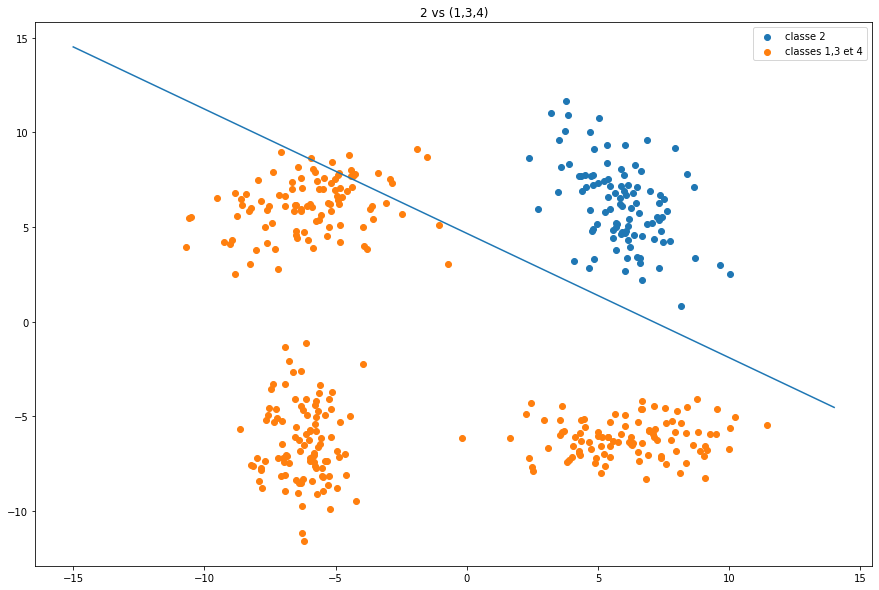

In [44]:
OvsA_adapte(2,df_app1, df_dec1, "2 vs (1,3,4)", "2", "1,3 et 4")

'le taux de bonne classification est : 75.0 %'

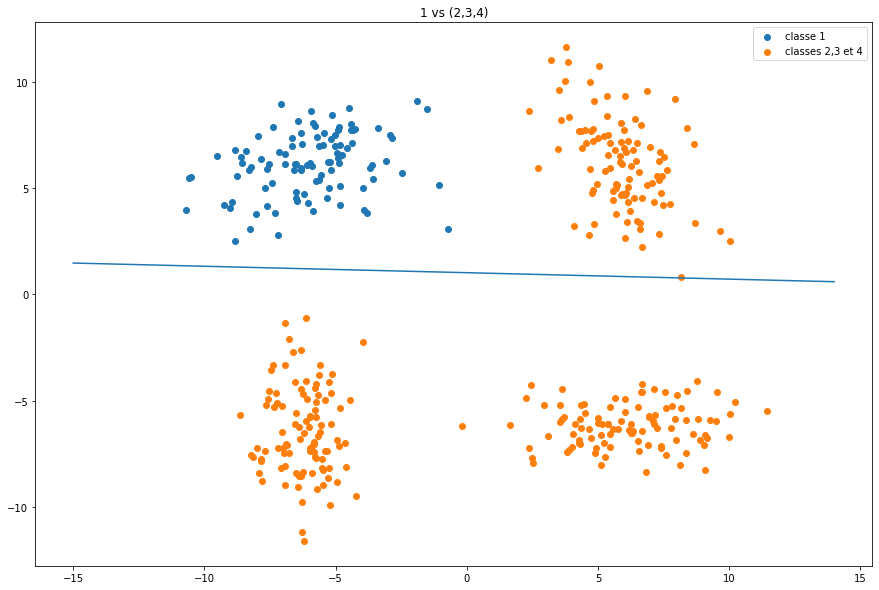

In [52]:
OvsA_adapte(1,df_app1, df_dec1, "1 vs (2,3,4)", "1", "2,3 et 4")

'le taux de bonne classification est : 74.75 %'

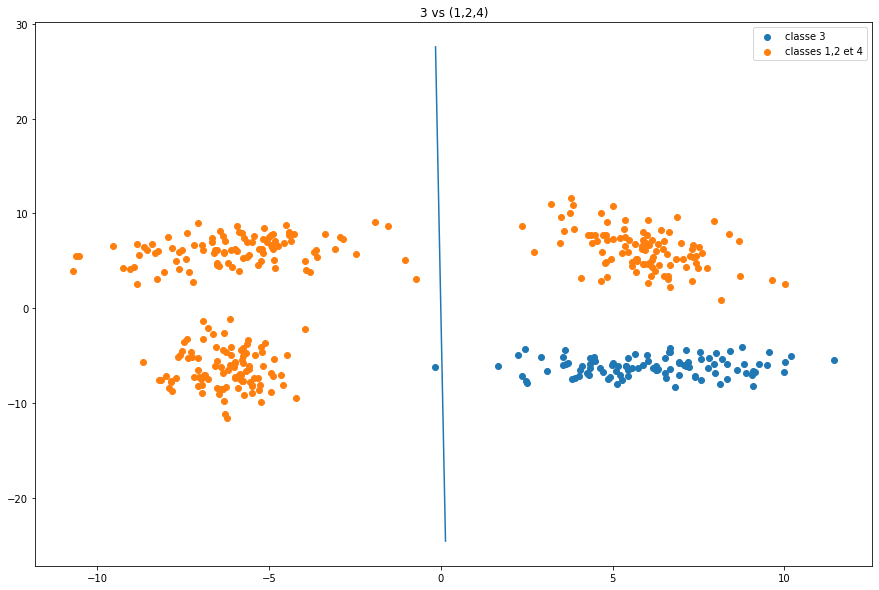

In [53]:
OvsA_adapte(3,df_app1, df_dec1, "3 vs (1,2,4)", "3", "1,2 et 4")

### Evaluation avec Matrice de Confusion sur les jeux d'apprentissages et de test 1 en One versus One 

In [82]:
def classification_accuracy3(W1,last_a,W2,size1,size2):
    tx = 0
    size_of_data = size1+size2
    for point1 in W1:
        metrique1=equation(last_a,point1)
        if metrique1<0:
            tx = tx + 1
    for point2 in W2:
        metrique2=equation(last_a,point2)
        if metrique2<0:
            tx = tx + 1
    return (tx * 100)/ size_of_data

In [80]:
def Confusion_Matrix(df_app, df_dec):
    accuracy = []
    A = np.array([0,0,0])
    Vecteur_A = []
    W = [df_app.iloc[0:100,:],
        df_app.iloc[100:200,:],
        df_app.iloc[200:300,:],
        df_app.iloc[300:400,:],
        df_app.iloc[400:500,:]]
    W_dec = [df_dec.iloc[0:100,:],
        df_dec.iloc[100:200,:],
        df_dec.iloc[200:300,:],
        df_dec.iloc[300:400,:],
        df_dec.iloc[400:500,:]]
    precision=[1, 25, -25] 
    check_init = 1
    check = 1 # On check j
    p_app = []
    start = 0
    scores = []
    print("👉 Les A de chaque droites : \n")
    for i in range(start, 5):
        if (i==4):
            break;
        for j in range(start,5):
            if check > i and i!=j and check!=i :
                p_app, n, iteration = perceptron(W[j], W[i], A)
                scores.append(classification_accuracy3(np.array(W_dec[i]), p_app[len(p_app)-1],np.array(W_dec[j]),len(W_dec[i]),len(W_dec[j])))   
                Vecteur_A.append(p_app[len(p_app)-1])
                print(p_app[len(p_app)-1])
                check += 1
        check_init +=1
        check = check_init 
        start = check - 1
    print("\n👉 Nombre : ",len(Vecteur_A),"\n")  
    scores2 = []
    for i in range(5):
        if i!= 2 :
            p_app2, n, iteration = perceptron(W[i], W[i], A)            
            print(p_app2[2])
        else :
            p_app, n, iteration = perceptron(W[i], W[i], A)
        scores2.append(classification_accuracy3(np.array(W_dec[i]), p_app[len(p_app)-1],np.array(W_dec[i]),len(W_dec[i]),len(W_dec[i]))) 
    matrice = np.zeros((5,5))
    for i in range(5):
        for j in range(5):
                if i!=j :
                    matrice[i,j]=scores[i]
                elif i==j :
                    matrice[i,j]=scores2[i]
    print("👇 La matrice de confusion est :\n")
    return matrice

## Evaluation :

### ▶️ Dataset app1 et dec1

In [83]:
w1, w2, w3, w4, w5, df_app1 = getClasses(df_app1)
w1, w2, w3, w4, w5, df_dec1 = getClasses(df_dec1)
score1 = Confusion_Matrix(df_app1,df_dec1)
print(score1)

👉 Les A de chaque droites : 

[ 8.        2.167007 17.470169]
[21.        2.310403  1.265219]
[ 11.       -19.172044   1.441982]
[ 5.       -0.870703 -0.152942]
[ 5.       12.179131  0.813008]
[18.        0.139387 -2.721666]
[ 5.       -0.870703 -0.152942]
[  7.         2.274981 -12.276603]
[ 5.       -0.870703 -0.152942]
[ 5.       -0.870703 -0.152942]

👉 Nombre :  10 

[ 1.       -6.315382  6.344938]
[2.       3.043789 6.633307]
[ 4.       -5.824326 -8.025893]
[ 5.       -0.870703 -0.152942]
👇 La matrice de confusion est :

[[100.   43.   43.   43.   43. ]
 [ 50.5   0.   50.5  50.5  50.5]
 [ 54.   54.  100.   54.   54. ]
 [ 74.   74.   74.  100.   74. ]
 [ 50.   50.   50.   50.   75. ]]


### ▶️ Dataset app2 et dec2

In [70]:
w1, w2, w3, w4, w5, df_app2 = getClasses(df_app2)
w1, w2, w3, w4, w5, df_dec2 = getClasses(df_dec2)
score1 = Confusion_Matrix(df_app2,df_dec2)
print(score1)

👉 Les A de chaque droites : 

[ 4.        8.767356 -1.126612]
[ 6.       -0.400459 -0.738887]
[ 5.        1.40751  -0.502933]
[  6.         4.59722  -10.238909]
[ 6.       -0.400459 -0.738887]
[10.        0.091702  9.748202]
[14.        2.654183 -2.24269 ]
[10.       -5.184548  0.684718]
[ 8.       -1.145801 -3.689177]
[  9.       -11.058208  -0.411328]

👉 Nombre :  10 

[ 1.        4.917866 -3.116518]
[2.       2.085519 7.437741]
[ 4.       -3.510356  2.613585]
[ 5.       -4.799005 -7.322054]
👇 La matrice de confusion est :

[[50.   2.   2.   2.   2. ]
 [78.5 50.  78.5 78.5 78.5]
 [95.  95.  50.  95.  95. ]
 [71.  71.  71.  50.  71. ]
 [77.5 77.5 77.5 77.5 50. ]]


### ▶️ Dataset app3 et dec3

In [67]:
w1, w2, w3, w4, w5, df_app3 = getClasses(df_app3)
w1, w2, w3, w4, w5, df_dec3 = getClasses(df_dec3)
score1 = Confusion_Matrix(df_app3,df_dec3)
print(score1)

👉 Les A de chaque droites : 

[11.       -0.80104   0.810138]
[ 7.       -0.510939 -0.555732]
[13.        1.629602  0.972068]
[15.        1.546771 -2.440508]
[10.       -3.070954  1.988656]
[8.       0.682186 4.363837]
[ 5.        2.844938 -0.704711]
[ 7.       -6.330737  0.961124]
[16.       -4.109471  1.092245]
[ 9.       -6.289626 -4.718907]

👉 Nombre :  10 

[ 7.       -0.344804  1.047975]
[2.       3.17767  2.549837]
[ 4.       -4.538946 -4.589303]
[ 5.        2.844938 -0.704711]
👇 La matrice de confusion est :

[[ 41.   72.   72.   72.   72. ]
 [ 28.   53.   28.   28.   28. ]
 [ 29.5  29.5  11.   29.5  29.5]
 [ 75.5  75.5  75.5  69.   75.5]
 [ 46.5  46.5  46.5  46.5 100. ]]


<a id="section4"></a>
# Question 4 :  Analyse et Conclusion

Tout au long de ce travail, on peut s'apercevoir que le perceptron est un algorithme facile à mettre en oeuvre.

Une fois que l'on apprend avec les données d'apprentisages, on peut les mettre de coté et ne se focaliser que sur l'hyper plan qui est la droite de séparation linéaire obtenue à l'aide de ces derniers, laquelle permet de décider sur les données de test. 

Nous avons eu à notre disposition 3 Datasets soit 3 jeux de données, le premier dataset nous a donné [**des résultats satisfaisants**](#section1) car, avec ce dernier on a bien pu voir que les données étient linéairement séparables, le  deuxième jeux de données pas aussi simple que son précédent, nous a quand même permit d'avoir des résultats [**plus au moins passable**](#section2), par contre avec le troisième, il était claire que nous étions là face à un jeux de données quasi non linéaire et donc [**pour le quel la quête des hyperplans était nécessaire dans un context One versus All, mais n'a pas su dans la mesure du possible, sufir à remplir les conditions des hypothèses de linéarité**](#section3). 

En plus de l'évaluation en Top1, nous avons aussi essayer de ressortir une matrice de confusion avant d'aboutir à cette conclusion.

Par conséquent, nous osons dire que des jeux de données 1 à 3 nous partons du plus linéaire, au moins linéaire.